Deep Learning
=============

Assignment 4
------------

Previously in `2_fullyconnected.ipynb` and `3_regularization.ipynb`, we trained fully connected networks to classify [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) characters.

The goal of this assignment is make the neural network convolutional.

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [3]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


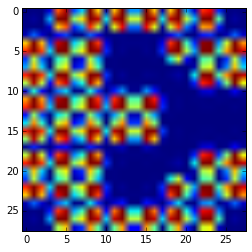

In [4]:
#x = tuple(randint(0,200000))
#randdigit=train_dataset[0]

plt.imshow(train_dataset[0,:,:])
plt.show()

Reformat into a TensorFlow-friendly shape:
- convolutions need the image data formatted as a cube (width by height by #channels)
- labels as float 1-hot encodings.

In [5]:
image_size = 28
num_digits = 5
image_size_wide = 28*num_digits
num_labels = 10
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28, 1) (200000, 10)
Validation set (10000, 28, 28, 1) (10000, 10)
Test set (10000, 28, 28, 1) (10000, 10)


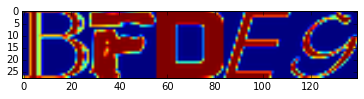

(28, 140)


[array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], dtype=float32)]

In [6]:
rndind = np.random.randint(200000, size = num_digits)

img = train_dataset[rndind[0],:,:,0]
for i in rndind[1:]:
    img = np.append(img, train_dataset[i,:,:,0], axis =1 )
    

#img = np.append(img, train_dataset[i,:,:,0], axis = 1)


#img = img.reshape(28,5*28,1)
plt.imshow(img)
plt.show()
print (img.shape)

[train_labels[k, :] for k in rndind]

Training Sample


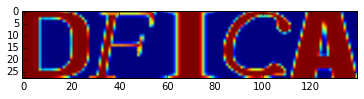

float64
(200000, 28, 140, 1)
(200000, 10)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Validation Sample


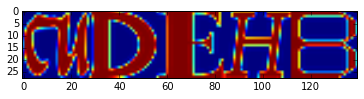

(10000, 28, 140, 1)
(10000, 10)
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
float32
Test Sample


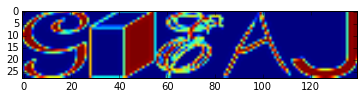

(10000, 28, 140, 1)
(10000, 10)
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
float32


In [7]:
num_train = 200000
num_test = 10000

train_dataset_HN = np.zeros([num_train,image_size,image_size_wide,1]) 
train_labels_HN1 = np.zeros([num_train,10])

valid_dataset_HN = np.zeros([num_test,image_size,image_size_wide,1]) 
valid_labels_HN1 = np.zeros([num_test,10])

test_dataset_HN = np.zeros([num_test,image_size,image_size_wide,1]) 
test_labels_HN1 = np.zeros([num_test,10])

img = np.zeros([image_size, image_size_wide])
labels = np.zeros([10, 10])

for j in range(num_train):
    rndind = np.random.randint(200000, size = num_digits)
    #img = train_dataset[rndind[0],:,:,0]
    for i, k in enumerate(rndind):
        img[:,28*i:28*(i+1)] = train_dataset[k,:,:,0]
        labels[i,:] = train_labels[k,:]
    train_dataset_HN[j,:,:,0] = img
    train_labels_HN1[j,:] = labels[0,:]

for j in range(num_test):
    rndind = np.random.randint(10000, size = num_digits)
    for i, k in enumerate(rndind):
        img[:,28*i:28*(i+1)] = valid_dataset[k,:,:,0]
        labels[i,:] = valid_labels[k,:]
    valid_dataset_HN[j,:,:,0] = img
    valid_labels_HN1[j,:] = labels[0,:]

for j in range(num_test):
    rndind = np.random.randint(10000, size = num_digits)
    for i, k in enumerate(rndind):
        img[:,28*i:28*(i+1)] = test_dataset[k,:,:,0]
        labels[i,:] = test_labels[k,:]
    test_dataset_HN[j,:,:,0] = img
    test_labels_HN1[j,:] = labels[0,:]
    
#img = np.append(img, train_dataset[i,:,:,0], axis = 1)


#Show validation images for train
print ('Training Sample')
plt.imshow(train_dataset_HN[-1,:,:,0])
plt.show()
print ((train_dataset_HN.dtype))
print (train_dataset_HN.shape)
print (train_labels_HN1.shape)
print (train_labels_HN1[-1,:])

print ('Validation Sample')
#Show validation image for verification
plt.imshow(valid_dataset_HN[-1,:,:,0])
plt.show()
print (valid_dataset_HN.shape)
print (valid_labels_HN1.shape)
print (valid_labels_HN1[-1,:])

valid_dataset_HN = valid_dataset_HN.astype(np.float32)
print ((valid_dataset_HN.dtype))

print ('Test Sample')
#Show Test image for verification
plt.imshow(test_dataset_HN[-1,:,:,0])
plt.show()
print (test_dataset_HN.shape)
print (test_labels_HN1.shape)
print (test_labels_HN1[-1,:])

test_dataset_HN = test_dataset_HN.astype(np.float32)
print ((test_dataset_HN.dtype))

In [8]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

Let's build a small network with two convolutional layers, followed by one fully connected layer. Convolutional networks are more expensive computationally, so we'll limit its depth and number of fully connected nodes.

STILL TRYING TO GET THE VALIDATION PORTION FO THE TRAINING TO WORK. 

In [10]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size_wide, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  
  tf_valid_dataset = tf.constant(valid_dataset_HN)
  tf_test_dataset = tf.constant(test_dataset_HN)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size_wide // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)

  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

print 'Graph Created'

In [11]:
num_steps = 1001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(num_steps):
        offset = (step * batch_size) % (train_labels_HN1.shape[0] - batch_size)
        batch_data = train_dataset_HN[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels_HN1[offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels_HN1))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels_HN1))

Initialized
Minibatch loss at step 0: 2.936814
Minibatch accuracy: 6.2%
Validation accuracy: 10.2%
Minibatch loss at step 50: 2.209312
Minibatch accuracy: 25.0%
Validation accuracy: 17.6%
Minibatch loss at step 100: 2.083138
Minibatch accuracy: 37.5%
Validation accuracy: 18.9%
Minibatch loss at step 150: 1.909073
Minibatch accuracy: 43.8%
Validation accuracy: 36.5%
Minibatch loss at step 200: 1.440449
Minibatch accuracy: 37.5%
Validation accuracy: 51.7%
Minibatch loss at step 250: 1.171442
Minibatch accuracy: 50.0%
Validation accuracy: 52.7%
Minibatch loss at step 300: 0.940196
Minibatch accuracy: 56.2%
Validation accuracy: 59.5%
Minibatch loss at step 350: 0.647697
Minibatch accuracy: 75.0%
Validation accuracy: 60.7%
Minibatch loss at step 400: 2.064612
Minibatch accuracy: 56.2%
Validation accuracy: 65.8%
Minibatch loss at step 450: 1.655487
Minibatch accuracy: 50.0%
Validation accuracy: 69.0%
Minibatch loss at step 500: 0.838478
Minibatch accuracy: 62.5%
Validation accuracy: 72.1%
Mi

---
Problem 1
---------

The convolutional model above uses convolutions with stride 2 to reduce the dimensionality. Replace the strides by a max pooling operation (`nn.max_pool()`) of stride 2 and kernel size 2.

---

In [28]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal([image_size // 7 * image_size // 7 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    pool = tf.nn.max_pool(conv + layer1_biases, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding ='SAME')
    hidden = tf.nn.relu(pool)#conv + layer1_biases)
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [29]:
num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 2.357869
Minibatch accuracy: 18.8%
Validation accuracy: 13.1%
Minibatch loss at step 50: 1.831911
Minibatch accuracy: 25.0%
Validation accuracy: 47.0%
Minibatch loss at step 100: 1.040364
Minibatch accuracy: 62.5%
Validation accuracy: 69.5%
Minibatch loss at step 150: 0.420944
Minibatch accuracy: 87.5%
Validation accuracy: 73.8%
Minibatch loss at step 200: 1.065444
Minibatch accuracy: 75.0%
Validation accuracy: 77.4%
Minibatch loss at step 250: 1.361476
Minibatch accuracy: 56.2%
Validation accuracy: 78.4%
Minibatch loss at step 300: 0.378981
Minibatch accuracy: 87.5%
Validation accuracy: 79.1%
Minibatch loss at step 350: 0.483298
Minibatch accuracy: 93.8%
Validation accuracy: 77.7%
Minibatch loss at step 400: 0.165536
Minibatch accuracy: 100.0%
Validation accuracy: 80.8%
Minibatch loss at step 450: 0.820894
Minibatch accuracy: 81.2%
Validation accuracy: 79.9%
Minibatch loss at step 500: 0.624498
Minibatch accuracy: 93.8%
Validation accuracy: 81.6%


---
Problem 2
---------

Try to get the best performance you can using a convolutional net. Look for example at the classic [LeNet5](http://yann.lecun.com/exdb/lenet/) architecture, adding Dropout, and/or adding learning rate decay.

---